# Challenge - Model Comparison

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing as preproc
import statsmodels.formula.api as smf
import warnings
%matplotlib inline

In [2]:
# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore", module="scipy")

In [3]:
data = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_3_deeper_into_supervised_learning/cnt_km_year_powerPS_minPrice_maxPrice_avgPrice_sdPrice.csv'

In [4]:
cars = pd.read_csv(data)

In [5]:
cars.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293
1,69,150000,1991,40,110,1600,516.4348,346.767661
2,11,90000,1991,60,330,10000,2342.4545,3017.432333
3,26,100000,1991,60,200,8750,1392.3846,1598.662833
4,42,125000,1991,60,150,4600,1140.6429,1010.314138


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 8 columns):
count       1770 non-null int64
km          1770 non-null int64
year        1770 non-null int64
powerPS     1770 non-null int64
minPrice    1770 non-null int64
maxPrice    1770 non-null int64
avgPrice    1770 non-null float64
sdPrice     1770 non-null float64
dtypes: float64(2), int64(6)
memory usage: 110.7 KB


In [7]:
cars.describe()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,160.992655,88652.542373,2005.472316,152.011299,4161.532203,21440.299435,10464.486905,3432.732575
std,378.592089,43909.507345,6.160430,80.359001,5492.165063,16356.444254,9219.917411,2878.065884
min,11.000000,5000.000000,1991.000000,40.000000,101.000000,950.000000,412.204500,193.395447
25%,20.000000,60000.000000,2001.000000,80.000000,350.000000,8900.000000,3244.878600,1474.916671
50%,47.000000,90000.000000,2007.000000,140.000000,1692.500000,17000.000000,7698.028200,2682.633933
75%,123.750000,125000.000000,2011.000000,200.000000,5999.750000,29800.000000,15409.960200,4468.457934
max,3623.000000,150000.000000,2015.000000,520.000000,36675.000000,99999.000000,66936.000000,22338.842417


(array([823., 424., 267., 146.,  65.,  30.,   7.,   4.,   3.,   1.]),
 array([  412.2045 ,  7064.58405, 13716.9636 , 20369.34315, 27021.7227 ,
        33674.10225, 40326.4818 , 46978.86135, 53631.2409 , 60283.62045,
        66936.     ]),
 <a list of 10 Patch objects>)

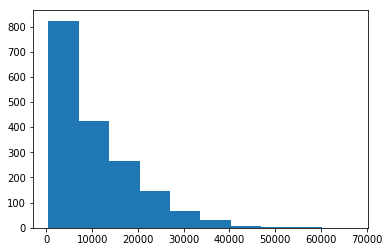

In [8]:
# View histogram of outcome variable
plt.hist(cars['avgPrice'])

(array([ 21.,  82., 150., 178., 237., 298., 322., 316., 151.,  15.]),
 array([ 6.02151959,  6.53051685,  7.03951411,  7.54851138,  8.05750864,
         8.5665059 ,  9.07550316,  9.58450043, 10.09349769, 10.60249495,
        11.11149222]),
 <a list of 10 Patch objects>)

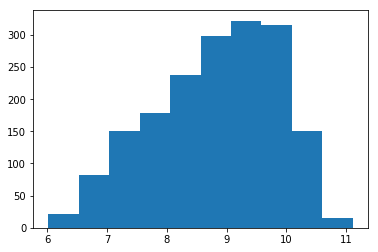

In [9]:
# View histogram of log of the outcome variable
plt.hist(np.log(cars['avgPrice']))

In [10]:
# Add the log of the outcome variable as a feature to the DataFrame
cars['logAvgPrice'] = np.log(cars['avgPrice'])

In [11]:
cars.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice,logAvgPrice
0,19,125000,1991,40,300,1499,648.3158,352.035293,6.474378
1,69,150000,1991,40,110,1600,516.4348,346.767661,6.246949
2,11,90000,1991,60,330,10000,2342.4545,3017.432333,7.758955
3,26,100000,1991,60,200,8750,1392.3846,1598.662833,7.238773
4,42,125000,1991,60,150,4600,1140.6429,1010.314138,7.039347


In [12]:
# Add scaled features to the DataFrame
cars['minmax_km'] = preproc.minmax_scale(cars[['km']])
cars['minmax_year'] = preproc.minmax_scale(cars[['year']])
cars['minmax_powerPS'] = preproc.minmax_scale(cars[['powerPS']])

/home/dj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  
/home/dj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  after removing the cwd from sys.path.


In [13]:
cars.head()

,count,km,year,powerPS,minPrice,maxPrice,avgPrice,sdPrice,logAvgPrice,minmax_km,minmax_year,minmax_powerPS
0,19,125000,1991,40,300,1499,648.3158,352.035293,6.474378,0.827586,0.0,0.000000
1,69,150000,1991,40,110,1600,516.4348,346.767661,6.246949,1.000000,0.0,0.000000
2,11,90000,1991,60,330,10000,2342.4545,3017.432333,7.758955,0.586207,0.0,0.041667
3,26,100000,1991,60,200,8750,1392.3846,1598.662833,7.238773,0.655172,0.0,0.041667
4,42,125000,1991,60,150,4600,1140.6429,1010.314138,7.039347,0.827586,0.0,0.041667


## Linear Regression

### Using scikit-learn

In [14]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
X = cars[['minmax_km', 'minmax_year', 'minmax_powerPS']]
y = cars['logAvgPrice']
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [-0.20275887  2.65816393  3.39305368]

Intercept: 
 6.537201868640395

R-squared:
0.9048525888415524


In [15]:
cross_val_score(regr, X, y, cv=5)

array([0.38864176, 0.75778453, 0.74759205, 0.8173221 , 0.83105259])

### Using statsmodels

In [16]:
linear_formula = 'logAvgPrice ~ minmax_km+minmax_year+minmax_powerPS'
lm = smf.ols(formula=linear_formula, data=cars).fit()

In [17]:
lm.params

Intercept         6.537202
minmax_km        -0.202759
minmax_year       2.658164
minmax_powerPS    3.393054
dtype: float64

In [18]:
lm.rsquared

0.9048525888415524

In [19]:
lm.pvalues

Intercept         0.000000e+00
minmax_km         6.919422e-12
minmax_year       0.000000e+00
minmax_powerPS    0.000000e+00
dtype: float64

### Assumptions of Multivariable Linear Regression

###### Assumption One:  Linear relationship with all variables

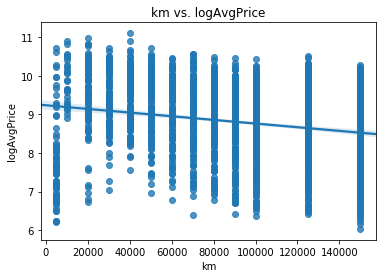

In [20]:
sns.regplot(x='km', y='logAvgPrice', data=cars)
plt.title('km vs. logAvgPrice')
plt.show()

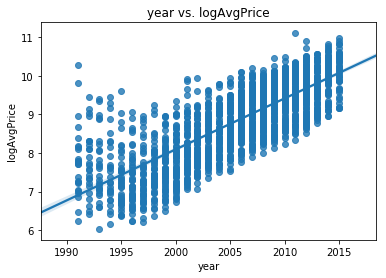

In [21]:
sns.regplot(x='year', y='logAvgPrice', data=cars)
plt.title('year vs. logAvgPrice')
plt.show()

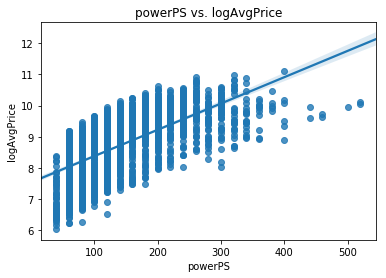

In [22]:
sns.regplot(x='powerPS', y='logAvgPrice', data=cars)
plt.title('powerPS vs. logAvgPrice')
plt.show()

###### Assumption Two:  Multivariate normality

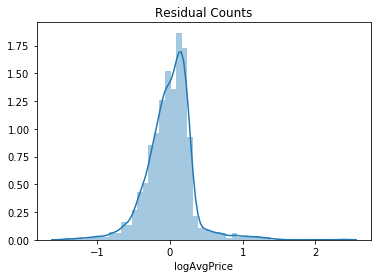

In [23]:
# Extract predicted values
pred = regr.predict(X).ravel()
actual = cars['logAvgPrice']

# Calculate the error, also called the residual
residual = actual - pred

sns.distplot(residual)
plt.title('Residual Counts')
plt.show()

###### Assumption Three:  Scedasticity

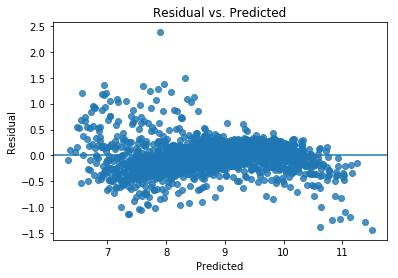

In [24]:
sns.regplot(x=pred, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

###### Assumption Four:  Low multicollinearity

In [25]:
X = cars[['minmax_km', 'minmax_year', 'minmax_powerPS']]
corrmat = X.corr()
display(corrmat)

,minmax_km,minmax_year,minmax_powerPS
minmax_km,1.000000,-0.418498,0.244530
minmax_year,-0.418498,1.000000,0.184255
minmax_powerPS,0.244530,0.184255,1.000000


## KNN (Un-weighted & Weighted)

In [26]:
def knn_unweighted_and_weighted(X, y, num):
    # Build our model.
    knn = neighbors.KNeighborsRegressor(n_neighbors=num)
    knn.fit(X, y)

    # Run the same model, this time with weights.
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=num, weights='distance')
    knn_w.fit(X, y)
    
    score = cross_val_score(knn, X, y, cv=5)
    print('k =', num)
    print("Unweighted R-squared: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    score_w = cross_val_score(knn_w, X, y, cv=5)
    print("Weighted R-squared: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
    
    print('\n'*2)

In [27]:
nums = [200, 100, 50, 25, 20, 15, 10, 5, 4, 3]

In [28]:
for k in nums:
    knn_unweighted_and_weighted(X, y, k)

k = 200
Unweighted R-squared: 0.12 (+/- 1.27)
Weighted R-squared: 0.25 (+/- 1.15)



k = 100
Unweighted R-squared: 0.41 (+/- 0.90)
Weighted R-squared: 0.47 (+/- 0.82)



k = 50
Unweighted R-squared: 0.57 (+/- 0.62)
Weighted R-squared: 0.60 (+/- 0.58)



k = 25
Unweighted R-squared: 0.64 (+/- 0.45)
Weighted R-squared: 0.66 (+/- 0.43)



k = 20
Unweighted R-squared: 0.66 (+/- 0.42)
Weighted R-squared: 0.68 (+/- 0.40)



k = 15
Unweighted R-squared: 0.68 (+/- 0.37)
Weighted R-squared: 0.70 (+/- 0.36)



k = 10
Unweighted R-squared: 0.71 (+/- 0.31)
Weighted R-squared: 0.72 (+/- 0.31)



k = 5
Unweighted R-squared: 0.75 (+/- 0.24)
Weighted R-squared: 0.75 (+/- 0.24)



k = 4
Unweighted R-squared: 0.75 (+/- 0.24)
Weighted R-squared: 0.75 (+/- 0.23)



k = 3
Unweighted R-squared: 0.75 (+/- 0.21)
Weighted R-squared: 0.76 (+/- 0.21)





### Summary:

The linear regression models outperform the KNN models evaluated. We observe low multicollinearity between the independent variables studied. This might contribute to the comparatively better performance of linear regression. Linear relationships appear in the independent variables relative to the transformed outcome variable. The dependent variables are horse power, year of release of the car, and mileage. The outcome variable represents the log of the average price of cars that are sold. The linear model's $R^2 = 0.905$ beats all obtained $R^2$ values of  unweighted & weighted KNNs models. **The range of $R^2$ for the k unweighted models is 0.12 (k=200) to 0.75 (k=3). The range of $R^2$ values for the k weighted models is 0.25 (k=200) to 0.76 (k=3).**